## Dataset loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_data(csv_file):
    data = pd.read_csv(csv_file)
    data_col_list = data.columns.to_list()
    x_col_list = data_col_list[:-1]
    print(f"Independent Values;\n{x_col_list}")

    y_col = data_col_list[-1]
    #Extract the independent variables (features) into matrix X
    X = data[x_col_list].values

    #Extract the dependent variable into vector Y
    Y = data[y_col].values
    print(f"dependent Values;\n{y_col}")
    return X, Y




In [3]:
from sklearn.model_selection import train_test_split

def split_data(X, Y, test_size=0.3, random_state=None):
    """
    Split the data into training and test sets.

    Args:
    X (numpy.ndarray): The independent variables (features).
    Y (numpy.ndarray): The dependent variable.
    test_size (float): The proportion of data to include in the test split (default is 0.3).
    random_state (int or None): Seed for random number generation (optional).

    Returns:
    X_train (numpy.ndarray): Training data for independent variables.
    X_test (numpy.ndarray): Test data for independent variables.
    Y_train (numpy.ndarray): Training data for the dependent variable.
    Y_test (numpy.ndarray): Test data for the dependent variable.
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test



## Initialize Parameters

In [4]:
def initialize_parameters(N_x, N_h, N_y):
    """
    Initialize parameters (weights and biases) for a neural network with two layers.
    
    Arguments:
    N_x -- Number of input features
    N_h -- Number of hidden units in layer 1
    N_y -- Number of output units in layer 2
    
    Returns:
    parameters -- A dictionary containing randomly initialized parameters:
                    W1 -- Weight matrix of shape (N_h, N_x)
                    b1 -- Bias vector of shape (N_h, 1)
                    W2 -- Weight matrix of shape (N_y, N_h)
                    b2 -- Bias vector of shape (N_y, 1)
    """
    np.random.seed(1)  # Seed for reproducibility
    
    # Initialize weights and biases for layer 1
    W1 = np.random.randn(N_h, N_x) * 0.01
    b1 = np.zeros((N_h, 1))
    
    # Initialize weights and biases for layer 2
    W2 = np.random.randn(N_y, N_h) * 0.01
    b2 = np.zeros((N_y, 1))
    
    # Store the parameters in a dictionary
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    
    return parameters




# Activation Function

In [5]:
def sigmoid(z):
    """
    Compute the sigmoid activation function for a given input.
    
    Arguments:
    z -- Input value (can be a scalar or a NumPy array)
    
    Returns:
    A -- Output of the sigmoid function, same shape as z
    """
    A = 1 / (1 + np.exp(-z))
    return A


In [6]:
def relu(z):
    """
    Compute the ReLU (Rectified Linear Unit) activation function for a given input.
    
    Arguments:
    z -- Input value (can be a scalar or a NumPy array)
    
    Returns:
    A -- Output of the ReLU function, same shape as z
    """
    A = np.maximum(0, z)
    return A


## Forward Pass

In [46]:
import numpy as np

def forward_pass(X, parameters):
    """
    Perform the forward pass in a two-layer neural network.
    
    Arguments:
    X -- Input data of shape (input_size, m), where m is the number of examples
    parameters -- A dictionary containing the parameters:
                    W1 -- Weight matrix of shape (hidden_size, input_size)
                    b1 -- Bias vector of shape (hidden_size, 1)
                    W2 -- Weight matrix of shape (output_size, hidden_size)
                    b2 -- Bias vector of shape (output_size, 1)
    
    Returns:
    A2 -- The sigmoid output of the second layer with shape (1, m)
    cache -- A dictionary containing the intermediate results required for backpropagation:
                Z1 -- The weighted sum of the first layer
                A1 -- The activation of the first layer (ReLU)
                Z2 -- The weighted sum of the second layer
                A2 -- The activation of the second layer (sigmoid)
    """
    # Retrieve parameters from the dictionary
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Forward propagation for layer 1 (ReLU activation)
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation
    
    # Forward propagation for layer 2 (sigmoid activation)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))  # Sigmoid activation
    
    # Store intermediate results in a cache
    cache = {
        "Z1": Z1,
        "A1": A1,
        "Z2": Z2,
        "A2": A2  # Store A2 in the cache
    }
    
    return A2, cache

# Cross Function - Cross Entropy

In [8]:
import numpy as np

def compute_cost(Y, Y_pred):
    """
    Compute the cross-entropy cost for binary classification.
    
    Arguments:
    Y -- True labels (ground truth), shape (1, m)
    Y_pred -- Predicted probabilities, shape (1, m)
    
    Returns:
    cost -- Cross-entropy cost
    """
    m = Y.shape[1]  # Number of examples

    # Compute the cross-entropy cost
    cost = -np.sum(Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred)) / m
    
    # Ensure the cost is a scalar value (not a NumPy array)
    cost = np.squeeze(cost)
    
    return cost


## Backward Pass

In [9]:
import numpy as np

def backward_pass(X, Y, cache, parameters):
    """
    Perform the backward pass to compute gradients of all parameters.

    Arguments:
    X -- Input data of shape (input_size, m)
    Y -- True labels (ground truth) of shape (1, m)
    cache -- A dictionary containing the intermediate results from the forward pass
    parameters -- A dictionary containing the parameters:
                    W1 -- Weight matrix of shape (hidden_size, input_size)
                    b1 -- Bias vector of shape (hidden_size, 1)
                    W2 -- Weight matrix of shape (output_size, hidden_size)
                    b2 -- Bias vector of shape (output_size, 1)

    Returns:
    grads -- A dictionary containing the gradients of all parameters:
                dW1 -- Gradient of W1
                db1 -- Gradient of b1
                dW2 -- Gradient of W2
                db2 -- Gradient of b2
    """
    m = X.shape[1]  # Number of examples

    # Retrieve intermediate results from the cache
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Compute the gradient of the cost with respect to A2
    dA2 = - (Y / A2 - (1 - Y) / (1 - A2))

    # Backpropagate through layer 2 (sigmoid activation)
    dZ2 = dA2 * A2 * (1 - A2)
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Backpropagate through layer 1 (ReLU activation)
    dA1 = np.dot(parameters["W2"].T, dZ2)
    dZ1 = dA1 * (A1 > 0)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    # Store gradients in a dictionary
    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads


## Fit

In [47]:
def fit(X_train, Y_train, X_test, Y_test, input_size, hidden_size, output_size, learning_rate, num_epochs):
    """
    Train a two-layer neural network using gradient descent and calculate training and testing errors.

    Arguments:
    X_train -- Training input data of shape (input_size, m_train)
    Y_train -- Training true labels (ground truth) of shape (1, m_train)
    X_test -- Testing input data of shape (input_size, m_test)
    Y_test -- Testing true labels (ground truth) of shape (1, m_test)
    input_size -- Number of input features
    hidden_size -- Number of hidden units in layer 1
    output_size -- Number of output units in layer 2
    learning_rate -- Learning rate for gradient descent
    num_epochs -- Number of training epochs

    Returns:
    parameters -- A dictionary containing the trained parameters (weights and biases)
    train_costs -- List of training cost values at each epoch
    test_costs -- List of testing cost values at each epoch
    """
    # Initialize parameters
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    # Initialize lists to store cost values at each epoch
    train_costs = []
    test_costs = []

    for epoch in range(num_epochs):
        # Training forward pass to compute predictions and intermediate results
        train_predictions, train_cache = forward_pass(X_train, parameters)

        # Compute training cost
        train_cost = compute_cost(Y_train, train_predictions)

        # Backward pass for training data to compute gradients
        train_grads = backward_pass(X_train, Y_train, train_cache, parameters)

        # Update parameters for training data using gradient descent
        parameters["W1"] -= learning_rate * train_grads["dW1"]
        parameters["b1"] -= learning_rate * train_grads["db1"]
        parameters["W2"] -= learning_rate * train_grads["dW2"]
        parameters["b2"] -= learning_rate * train_grads["db2"]

        # Testing forward pass to compute predictions and intermediate results
        test_predictions, _ = forward_pass(X_test, parameters)

        # Compute testing cost
        test_cost = compute_cost(Y_test, test_predictions)

        # Append the training and testing costs to their respective lists
        train_costs.append(train_cost)
        test_costs.append(test_cost)

        # Print the cost for every 100 epochs (optional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training Cost = {train_cost}, Testing Cost = {test_cost}")

    return parameters, train_costs, test_costs


## Driver

In [55]:
csv_file = 'dataset/Heart_Disease.csv'
X, Y = load_data(csv_file)

Independent Values;
['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
dependent Values;
TenYearCHD


In [56]:
X_train, X_test, Y_train, Y_test = split_data(X, Y, test_size=0.3, random_state=42)

In [67]:
N_x = 15  # Number of input features
N_h = 20 # Number of hidden units in layer 1
N_y = 2  # Number of output units in layer 2
lr = 0.0001
epochs = 1000

In [68]:
params, train_cost, test_cost = fit(
    X_train = X_train.T,
    Y_train = Y_train.reshape(1,-1),
    X_test = X_test.T,
    Y_test = Y_test.reshape(1,-1),
    input_size = N_x,
    hidden_size = N_h,
    output_size = N_y,
    learning_rate = lr,
    num_epochs = epochs
)

Epoch 0: Training Cost = 1.3577075340845104, Testing Cost = 1.3510269372226134
Epoch 100: Training Cost = 0.9578016659869815, Testing Cost = 0.9500658734128805
Epoch 200: Training Cost = 0.8897116521673942, Testing Cost = 0.8796491388033176
Epoch 300: Training Cost = 0.8871695583281062, Testing Cost = 0.8764462058076953
Epoch 400: Training Cost = 0.8867336838763153, Testing Cost = 0.875994590842423
Epoch 500: Training Cost = 0.8863713586261306, Testing Cost = 0.8757663230456247
Epoch 600: Training Cost = 0.8860618547897218, Testing Cost = 0.8755777106323166
Epoch 700: Training Cost = 0.8857590979958987, Testing Cost = 0.8753952257999631
Epoch 800: Training Cost = 0.8854560504454411, Testing Cost = 0.8752192433666056
Epoch 900: Training Cost = 0.8851550962155134, Testing Cost = 0.8750428385391035


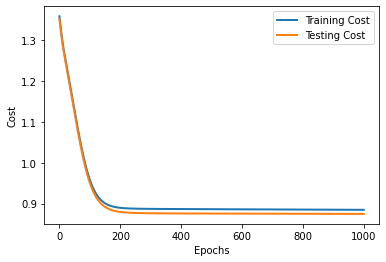

In [69]:
import matplotlib.pyplot as plt

# Create an array of epoch numbers for the x-axis

_epochs = range(len(train_cost))

# Plot training and testing costs
plt.plot(_epochs, train_cost, label='Training Cost', linewidth=2)
plt.plot(_epochs, test_cost, label='Testing Cost', linewidth=2)

# Add labels and legend
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()

plt.savefig(f"plots/hidden_units:{N_h},lr:{lr}, epochs:{epochs}.png")

# Show the plot
plt.show()


In [70]:
type(params)

dict

## Save Model

In [71]:
import pickle

# Define the filename for the pickle file
params_filename = 'Stroke_Prediction_2_layer_NN.pkl'

# Save the 'params' dictionary as a pickle file
with open(params_filename, 'wb') as file:
    pickle.dump(params, file)

print(f'Trained parameters saved as {params_filename}')


Trained parameters saved as Stroke_Prediction_2_layer_NN.pkl


## Load Model

In [72]:
import pickle

# Define the filename for the pickle file
params_filename = 'Stroke_Prediction_2_layer_NN.pkl'

# Load the parameters from the pickle file
with open(params_filename, 'rb') as file:
    loaded_params = pickle.load(file)


## Prediction 

In [73]:
import numpy as np

def predict(parameters, X):
    """
    Make predictions using the trained neural network.

    Arguments:
    parameters -- A dictionary containing the trained parameters (weights and biases)
    X -- Input data of shape (input_size, m)

    Returns:
    predictions -- Predicted output of shape (1, m)
    """
    # Retrieve the parameters from the dictionary
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Perform the forward pass to compute predictions
    Z1 = np.dot(W1, X) + b1
    A1 = np.maximum(0, Z1)  # ReLU activation
    Z2 = np.dot(W2, A1) + b2
    predictions = 1 / (1 + np.exp(-Z2))  # Sigmoid activation

    return predictions


In [88]:
# Input vector for prediction (shape: (input_size, m))
input_vector = np.array([0, 63, 1, 0, 0, 0, 0, 0, 0, 205, 138, 71, 33.11, 60, 85]).reshape(-1, 1)

# Make predictions using the loaded parameters
predictions = predict(loaded_params, input_vector)

# Define a threshold (e.g., 0.5)
threshold = 0.5

# Convert predictions to binary (0 or 1) based on the threshold
binary_predictions = (predictions >= threshold).astype(int)

print(binary_predictions)


[[0]
 [0]]


## Push to Hub

In [90]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="Stroke_Prediction_2_layer_NN.pkl",
    path_in_repo="model.pkl",
    repo_id="sharoz/Stroke_Prediction_2_layer_NN",
    repo_type="model",
)

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

Stroke_Prediction_2_layer_NN.pkl:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

'https://huggingface.co/sharoz/Stroke_Prediction_2_layer_NN/blob/main/model.pkl'